# Predicting Airline Passenger Satisfaction

This notebook looks into using various python-based Machine Learning and data science libraries in an attempt to build a Machine Learning Model capable of predicting what is the satistfaction of a airline passenger. In addition, it looks into what factor are highly correlated to passenger's satisfaction

The approch taken is the following:

## 1. Problem definition

The problem is explorin a binary classification.
This is becasue different features about a person's flight experience is used to predict whether it was "satisfied" or "neutral or dissatisfied"

In a statement:
> Given features about the passenger's flight experience, can we predict if they are satisfied?


## 2. Data
The data is retrieved from Kaggle: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction
There are 24 features referred to as independen variables and a target variable referred as dependent variable.


## 3. Evaluation
Since there is no information about evaluating model performace. Accuracy above 85% will be accepted


## 4. Features
The independent variables used to predict our target are the following:

* Gender: Gender of the passengers (Female, Male)
* Customer Type: The customer type (Loyal customer, disloyal customer)
* Age: The actual age of the passengers
* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
* Flight distance: The flight distance of this journey
* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
* Ease of Online booking: Satisfaction level of online booking
* Gate location: Satisfaction level of Gate location
* Food and drink: Satisfaction level of Food and drink
* Online boarding: Satisfaction level of online boarding
* Seat comfort: Satisfaction level of Seat comfort
* Inflight entertainment: Satisfaction level of inflight entertainment
* On-board service: Satisfaction level of On-board service
* Leg room service: Satisfaction level of Leg room service
* Baggage handling: Satisfaction level of baggage handling
* Check-in service: Satisfaction level of Check-in service
* Inflight service: Satisfaction level of inflight service
* Cleanliness: Satisfaction level of Cleanliness
* Departure Delay in Minutes: Minutes delayed when departure
* Arrival Delay in Minutes: Minutes delayed when Arrival

This is the target variable:
* Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Preparing the tools

In [3]:
#Import all the tools we need

#Regular EDA (exploratory data analysis) and plottig libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data & Data Exploration

In [4]:
df_test = pd.read_csv("test.csv", index_col="Unnamed: 0")
df_train = pd.read_csv("train.csv", index_col="Unnamed: 0")

In [5]:
df_test.shape, df_train.shape

((25976, 24), (103904, 24))

In [4]:
# First 10 columns from training dataframe
df_train.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [5]:
# Let's see how many "satissfied" and "unsatissfied" sample there are
df_train.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Since these two values are close to even, our target column can be considered balanced. An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of your target classes have the same number of samples.

In [6]:
# Normalize value counts
df_train.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

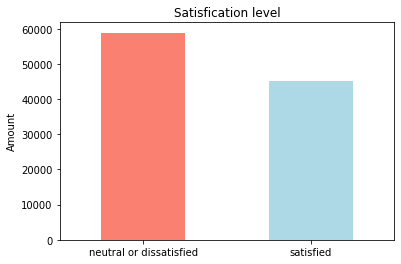

In [7]:
# Plot of target column
df_train.satisfaction.value_counts().plot(kind="bar", color=["salmon","lightblue"], title="Satisfication level")
plt.ylabel("Amount")
plt.xticks(rotation=0)

### Satisfaction according to Gender

In [8]:
df_train.Gender.value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

Gender,Female,Male,All
satisfaction,,,
neutral or dissatisfied,30193,28686,58879
satisfied,22534,22491,45025
All,52727,51177,103904


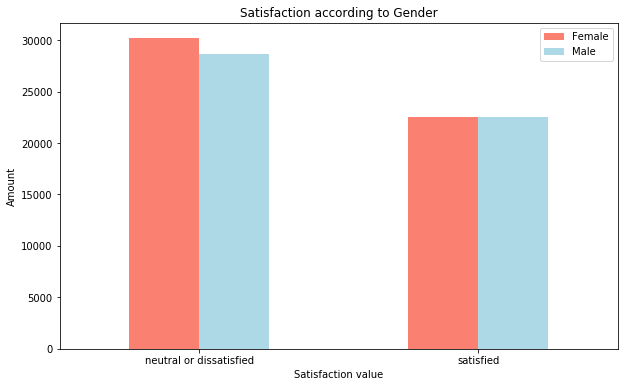

In [9]:
#Create a plot of crosstab
pd.crosstab(df_train.satisfaction, df_train.Gender).plot(kind="bar", figsize=(10,6), color =["salmon","lightblue"])
plt.title("Satisfaction according to Gender")
plt.xlabel("Satisfaction value")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);
pd.crosstab(df_train.satisfaction,df_train.Gender, margins=True )

### Satisfaction according to Customer Type

Customer Type,Loyal Customer,disloyal Customer,All
satisfaction,,,
neutral or dissatisfied,44390,14489,58879
satisfied,40533,4492,45025
All,84923,18981,103904


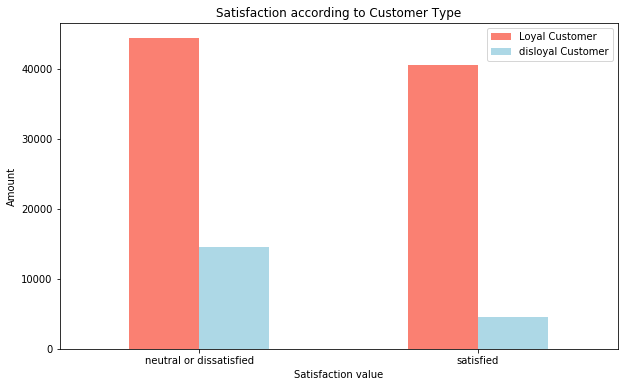

In [10]:
pd.crosstab(df_train["satisfaction"], df_train["Customer Type"]).plot(kind="bar", figsize=(10,6), color=["salmon","lightblue"])
plt.title("Satisfaction according to Customer Type")
plt.xlabel("Satisfaction value")
plt.ylabel("Amount")
plt.legend(df_train["Customer Type"].unique())
plt.xticks(rotation=0)
pd.crosstab(df_train["satisfaction"], df_train["Customer Type"], margins=True)

Now that we visualize some variables let's find out if there are missing data in the Dataframes

In [11]:
df_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [13]:
df_test.isna().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

## Convert strings(objects) to categories and numeric values & fill missing data for analysis
Since there are missing values and object on the data sets, we need to solve this before modelling

### Convert string to categories
One way to help turn all of our data into numbers is to convert the columns with the string datatype into a category datatype.

To do this we can use the pandas types API which allows us to interact and manipulate the types of data.

In [15]:
# Check the columns which contain strings
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Gender
Customer Type
Type of Travel
Class
satisfaction


In [16]:
# This will turn all of the strings values into category values
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content):
        df_train[label] = content.astype("category").cat.as_ordered()

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 103904 non-null  int64   
 1   Gender                             103904 non-null  category
 2   Customer Type                      103904 non-null  category
 3   Age                                103904 non-null  int64   
 4   Type of Travel                     103904 non-null  category
 5   Class                              103904 non-null  category
 6   Flight Distance                    103904 non-null  int64   
 7   Inflight wifi service              103904 non-null  int64   
 8   Departure/Arrival time convenient  103904 non-null  int64   
 9   Ease of Online booking             103904 non-null  int64   
 10  Gate location                      103904 non-null  int64   
 11  Food and drink            

In [18]:
#Let's check the new categories
df_train["Customer Type"].cat.categories

Index(['Loyal Customer', 'disloyal Customer'], dtype='object')

In [19]:
# Code for new categories 
df_train["Customer Type"].cat.codes

0         0
1         1
2         0
3         0
4         0
         ..
103899    1
103900    0
103901    1
103902    1
103903    0
Length: 103904, dtype: int8

In [20]:
# All the data is now categorical, thus we can now turn them into numbers
#Although there still is missing data
df_train.isnull().sum()/len(df_train)

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [21]:
df_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

### Fill missing values

The mean of Arrival delay in minutes is:  15.18
The median of Arrival delay in minutes is:  0.0


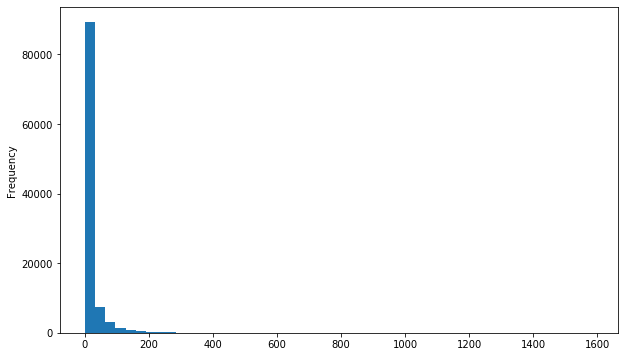

In [22]:
# The only column with missing values is "Arrival Delay in Minutes". We can use the median or the mean to fill it
df_train["Arrival Delay in Minutes"].plot(kind="hist",figsize=(10,6), bins=50)
print("The mean of Arrival delay in minutes is: " , round(df_train["Arrival Delay in Minutes"].mean(), 2))
print("The median of Arrival delay in minutes is: " , round(df_train["Arrival Delay in Minutes"].median(), 2))

#Since this is not a normal distribution, in addition, to avoid influence form outliers, we will fill with the median. 

In [23]:
# Check for which column have null values
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Arrival Delay in Minutes


In [24]:
# Fill numeric rows with the median
for label, content in df_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column which tells if the data was missing our not
            df_train[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_train[label] = content.fillna(content.median())


Why add a binary column indicating whether the data was missing or not?

We can easily fill all of the missing numeric values in our dataset with the median. However, a numeric value may be missing for a reason. In other words, absence of evidence may be evidence of absence. Adding a binary column which indicates whether the value was missing or not helps to retain this information.

In [25]:
# check if there is any null values
df_train.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes               0
satisfaction                           0
Arrival Delay in

### Turning categorical variables into numbers
Since there are not missing values on the categorial values, we'll only turn them into numbers prior modeling

In [26]:
# Check column which aren't numeric
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label) 
        

Gender
Customer Type
Type of Travel
Class
satisfaction


In [27]:
# Turn categorical variables into numbers
for label, content in df_train.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add binary column to indicate whether sample had missing value
        df_train[label+"_is_missing"] = pd.isnull(content)
        #we add the +1 because pandas encodes missing categories as -1
        df_train[label] = pd.Categorical(content).codes + 1 

In [28]:
# now all values are numeric dtype
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   103904 non-null  int64  
 1   Gender                               103904 non-null  int8   
 2   Customer Type                        103904 non-null  int8   
 3   Age                                  103904 non-null  int64  
 4   Type of Travel                       103904 non-null  int8   
 5   Class                                103904 non-null  int8   
 6   Flight Distance                      103904 non-null  int64  
 7   Inflight wifi service                103904 non-null  int64  
 8   Departure/Arrival time convenient    103904 non-null  int64  
 9   Ease of Online booking               103904 non-null  int64  
 10  Gate location                        103904 non-null  int64  
 11  Food and drin

Since all these changes have been made only in the train dataframe they should also be done in the test dataframe.
We're not going to rewrite all these steps for every dataset.
So let's create a function to do all the preprocessing easier

In [6]:
def preprocess_data(df):
    """
    Fills all numeric and categorical data from our dataset
    Turns all categorical data into numeric values prior model building
    """
    #Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
    
    #Turn Categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            #We add +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes + 1
    return df

### Preprocess test data frame 
Use our function to preprocess test dataframe

In [7]:
df_test = preprocess_data(df_test)
df_train = preprocess_data(df_train)

In [31]:
df_test

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_is_missing,Customer Type_is_missing,Type of Travel_is_missing,Class_is_missing,Arrival Delay in Minutes_is_missing,satisfaction_is_missing
0,19556,1,1,52,1,2,160,5,4,3,...,5,50,44.0,2,False,False,False,False,False,False
1,90035,1,1,36,1,1,2863,1,1,3,...,5,0,0.0,2,False,False,False,False,False,False
2,12360,2,2,20,1,2,192,2,0,2,...,2,0,0.0,1,False,False,False,False,False,False
3,77959,2,1,44,1,1,3377,0,0,0,...,4,0,6.0,2,False,False,False,False,False,False
4,36875,1,1,49,1,2,1182,2,3,4,...,4,0,20.0,2,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,2,2,34,1,1,526,3,3,3,...,4,0,0.0,1,False,False,False,False,False,False
25972,71167,2,1,23,1,1,646,4,4,4,...,4,0,0.0,2,False,False,False,False,False,False
25973,37675,1,1,17,2,2,828,2,5,1,...,2,0,0.0,1,False,False,False,False,False,False
25974,90086,2,1,14,1,1,1127,3,3,3,...,4,0,0.0,2,False,False,False,False,False,False


### Correlation between independent variables
Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using df.corr() which will create a correlation matrix for us, in other words, a big table of numbers telling us how related each variable is the other.

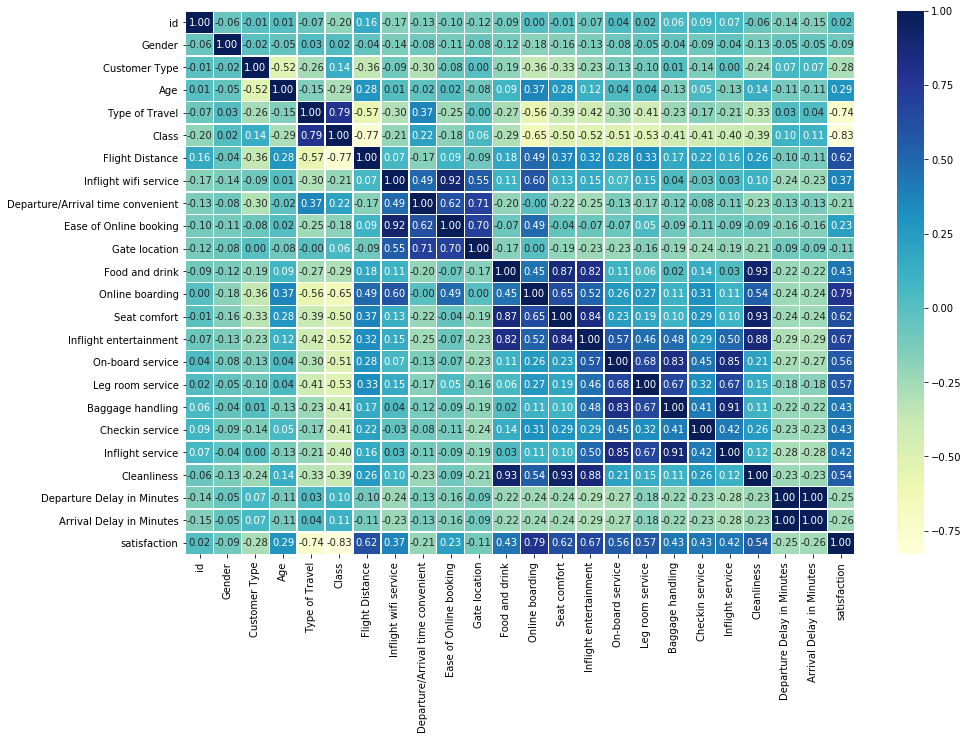

In [8]:
df_train_corr= df_train.copy()
df_train_corr = df_train_corr.loc[:,:"satisfaction"].corr()
matrix_corr = df_train_corr.corr()
plt.figure(figsize=(15,10))
sns.heatmap(matrix_corr,
           annot=True,
           linewidths=0.5,
           fmt=".2f",
           cmap="YlGnBu")

### Splitting data into validation and tain variables

In [9]:
X_train, y_train = df_train.drop("satisfaction", axis=1), df_train["satisfaction"]
X_test, y_test = df_test.drop("satisfaction", axis=1), df_test["satisfaction"]

In [10]:
#check shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103904, 29), (103904,), (25976, 29), (25976,))

## Modeling
Now that we've got our data ready for modeling let's build a Machine Learning Model

Try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors
3. RandomForest

In [37]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
         "Logistic Regression": LogisticRegression(),
         "Random Forest": RandomForestClassifier()}

#Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    #Random seed for reproducible results
    np.random.seed(42)
    #Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [39]:
#Builds models and gives scores
model_scores = fit_and_score(models,
                             X_train,
                             X_test,
                             y_train,
                             y_test)
model_scores

C:\Users\Aldo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6756621496766245,
 'Logistic Regression': 0.7080766861718509,
 'Random Forest': 0.9648906683092086}

## Model comparison
Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

Text(0, 0.5, 'Accuracy %')

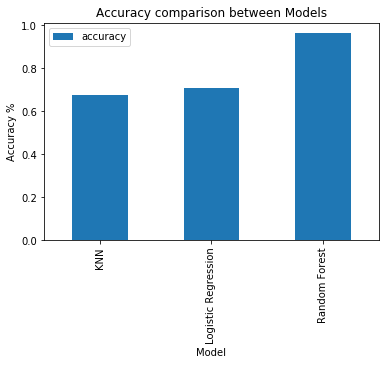

In [40]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
plt.title("Accuracy comparison between Models")
plt.xlabel("Model")
plt.ylabel("Accuracy %")

## Hyperparameter tuning and cross-validation
We're going to improve both models, LogiscticRegression and RandomForestClassifier, since these have the highest accuracy on the score test

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like precision, recall, F1-score and ROC at the same time.

Here's the game plan:

1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

### Tuning mmodel with GridSearchCV

In [42]:
%%time
#Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}
#Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         verbose =True)
#Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished


Wall time: 3min


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04,...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
       

In [43]:
#check the best paramters
gs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'liblinear'}

## Evaluating our tuned machine learning classifier beyond accuracy
* Roc curve and AUC curve
* Confusion matrix *Classification report
* Precision
* Recall
* F1

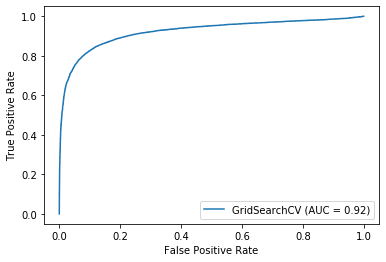

In [47]:
# Plot ROC curve and calculate ACU metric
#The closer to 1 the better
plot_roc_curve(gs_log_reg, X_test, y_test)

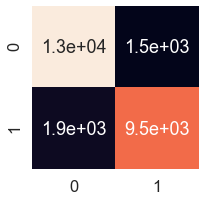

In [55]:
#Confusion matrix
sns.set(font_scale=1.5)

#Make predictions on the test data
y_preds = gs_log_reg.predict(X_test)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    #plt.xlabel("true label")
    #plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

In [56]:
# Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           1       0.87      0.89      0.88     14573
           2       0.86      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.86     25976
weighted avg       0.87      0.87      0.87     25976



* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Calculate evaluation metrics using cross validation
We're going to calculate precision,  recall and f1 score using crossvalscore

In [57]:
# #Cross validated accuracy
# cv_acc = cross_val_score(gs_log_reg, X_train, y_train, cv=5, scoring="accuracy")
# cv_acc = np.mean(cv_acc)

# # Cross-validated precision
# cv_precision = cross_val_score(gs_log_reg, X_train, y_train, cv=5, scoring="precision")
# cv_precision = np.mean(cv_precision)

# #Cross validated recall
# cv_recall = cross_val_score(gs_log_reg, X_train, y_train, cv=5, scoring="recall")
# cv_recall = np.mean(cv_recall)

# #Cross validated f1
# cv_f1 = cross_val_score(gs_log_reg,X_train, y_train,cv=5, scoring="f1")
# cv_f1 = np.mean(cv_f1)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


ValueError: If using all scalar values, you must pass an index

In [59]:
cv_acc

0.8609004569816241

In [60]:
cv_precision  

0.8674461568777462

In [61]:
cv_recall

0.8906400740215084

In [62]:
cv_f1

0.8788851062984003

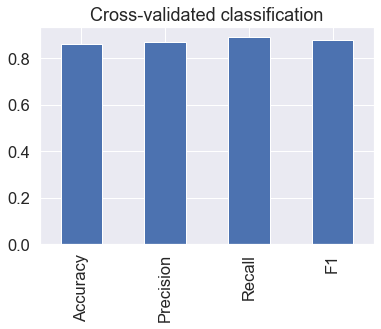

In [64]:
#Visualize cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification", legend=False)

## Feature importance

In [66]:
#Check model best params
gs_log_reg.best_params_

{'C': 11.288378916846883, 'solver': 'liblinear'}

In [11]:
clf = LogisticRegression(C=11.288378916846883, solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
clf.coef_

array([[-5.72215943e-06, -2.93023722e-01, -7.06554368e-01,
        -6.69551182e-03, -1.07259621e+00, -1.15608298e+00,
         8.70772858e-05,  2.84695903e-01, -1.03558628e-01,
        -1.24663244e-01,  3.86349900e-04, -1.55861200e-01,
         5.18735798e-01,  9.37683031e-02,  3.56127672e-01,
         2.27294761e-01,  1.91685945e-01, -7.56154605e-03,
         2.00500548e-01, -4.48152011e-02,  8.44011361e-02,
         4.59089753e-03, -8.42997460e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.88581820e-03,  0.00000000e+00]])

In [13]:
X_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_is_missing', 'Customer Type_is_missing',
       'Type of Travel_is_missing', 'Class_is_missing',
       'Arrival Delay in Minutes_is_missing', 'satisfaction_is_missing'],
      dtype='object')

In [14]:
# Match features to columns
features_dict = dict(zip(X_train.columns, list(clf.coef_[0])))
features_dict

{'id': -5.722159432331412e-06,
 'Gender': -0.2930237215171152,
 'Customer Type': -0.7065543684447909,
 'Age': -0.006695511817687021,
 'Type of Travel': -1.0725962140686416,
 'Class': -1.1560829753328783,
 'Flight Distance': 8.707728583665168e-05,
 'Inflight wifi service': 0.2846959026502214,
 'Departure/Arrival time convenient': -0.10355862832258467,
 'Ease of Online booking': -0.12466324378694753,
 'Gate location': 0.0003863498999685165,
 'Food and drink': -0.15586120038289325,
 'Online boarding': 0.5187357983810241,
 'Seat comfort': 0.09376830311778266,
 'Inflight entertainment': 0.3561276720781232,
 'On-board service': 0.22729476095915419,
 'Leg room service': 0.19168594475824008,
 'Baggage handling': -0.007561546049912506,
 'Checkin service': 0.2005005483861299,
 'Inflight service': -0.04481520110742701,
 'Cleanliness': 0.08440113608482601,
 'Departure Delay in Minutes': 0.004590897532101218,
 'Arrival Delay in Minutes': -0.008429974602097151,
 'Gender_is_missing': 0.0,
 'Customer 

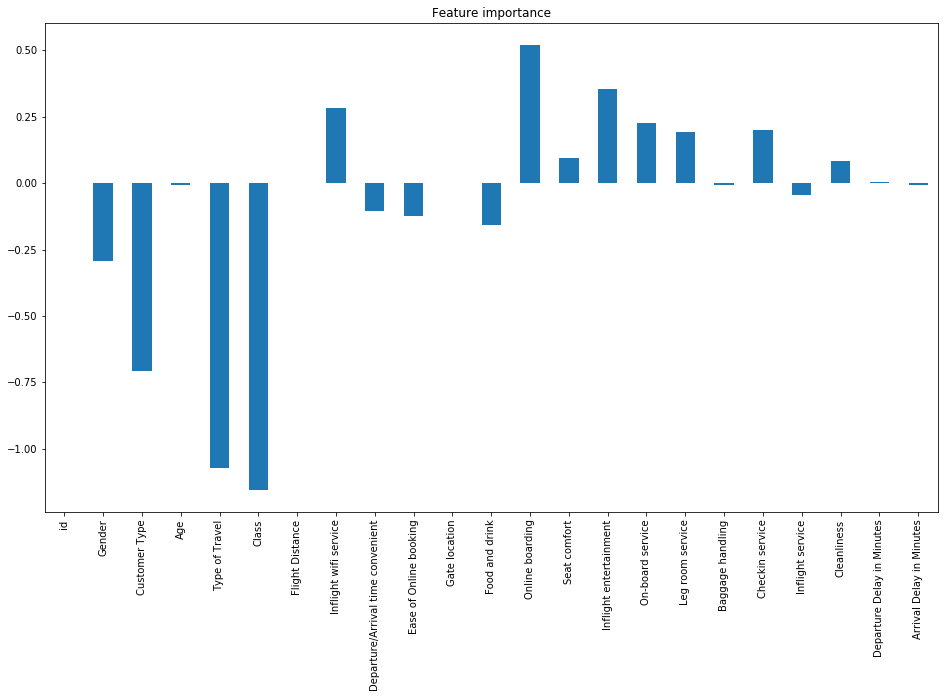

In [15]:
# Visualize feature importance
columns=['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
features_df = pd.DataFrame(features_dict, index=[0])
features_df[columns].T.plot.bar(figsize=(16,9),title="Feature importance", legend=False)

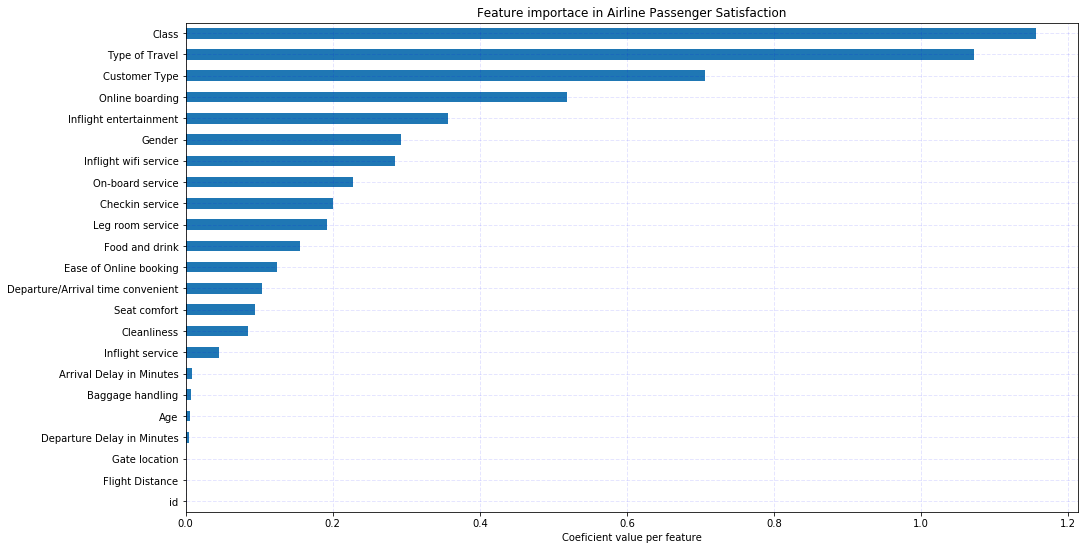

In [47]:
features_df[columns].abs().max().sort_values().plot(kind="barh", figsize=(16,9))
plt.title("Feature importace in Airline Passenger Satisfaction")
plt.xlabel("Coeficient value per feature")
plt.grid(color="b", linestyle="--", linewidth=1, alpha=0.1)